In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fmin

plt.rcParams["figure.figsize"] = [19, 7.2]

In [3]:
dctrl = np.loadtxt('control.txt')
dko = np.loadtxt('ko.txt')

In [4]:
def Za(Z,t,k,b,s,r,m):
    
    Gi, Gs, I, U = Z
    
    Gs_base = 150

    res = [
        -Gi*U ,        
        Gi*U - (s*I*Gs + b*max(0, Gs-Gs_base)),
        r*Gs - m*I,
        -k*U
    ]
    return res

In [5]:
G0, U0, Gs_ini, I_ini = 4500, 0.04, 100, 10
param_opti = [1.62081705e-02, 9.94752179e-02, 1.03364289e-01, 3.56849959e-05, 1.20465835e-01] # k,b,s,r,m

In [6]:
## Apprentissage du model sur les données controles

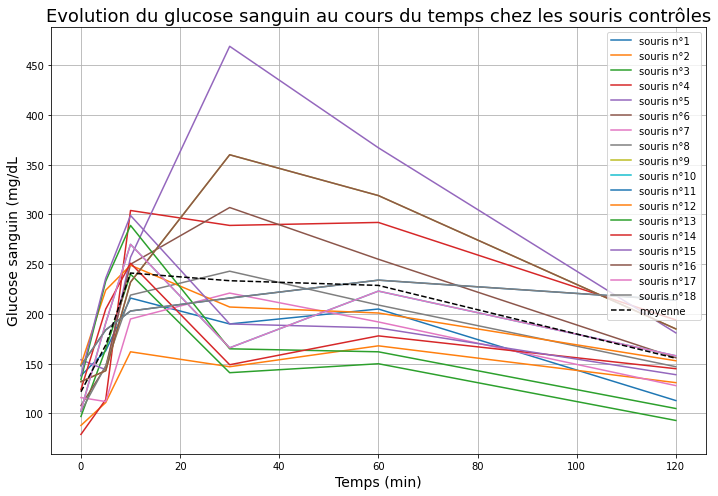

In [46]:
# Transformation des données : ajout d'une moyenne
plt.rcParams["figure.figsize"] = [10, 7]

moy = np.ones((len(dctrl[:,1])-1,))
for k in range(len(moy)) :
    moy[k] = round(np.sum(dctrl[k+1,1:])/len(dctrl[k+1,1:]),2)

for k in range(1,len(dctrl[1,:])):
    plt.plot(dctrl[1:,0],dctrl[1:,k], label = f'souris n°{k}')
plt.plot(dctrl[1:,0],moy, linestyle='--', color = 'k', label = 'moyenne')
plt.grid()
plt.legend()
plt.title('Evolution du glucose sanguin au cours du temps chez les souris contrôles',fontsize = 18)

plt.xlabel('Temps (min)',fontsize = 14)
plt.ylabel('Glucose sanguin (mg/dL',fontsize = 14)

plt.tight_layout()

plt.show()

In [8]:
# Optimisation
def sse(param) :

    k,b,s,r,m = param
    y0 = [G0,Gs_ini,I_ini,U0]    
    y = odeint(Za,y0,dctrl[1:,0], args = (k,b,s,r,m))

    return np.sum((y[:,1]-moy)**2) + (k<0)*1e8 + (b<0)*1e8 + (s<0)*1e8 +(r<0)*1e8 +(m<0)*1e8


G0, U0, Gs_ini, I_ini = 2500, 0.04, 100, 10

minimum = fmin(sse, [ 0.01, 0.001, 0.1, 0.001, 0.1])
print(minimum)

Optimization terminated successfully.
         Current function value: 2086.479719
         Iterations: 558
         Function evaluations: 899
[7.76910056e-10 3.73824342e-03 4.84877691e-02 6.72293076e-05
 4.85537426e-02]


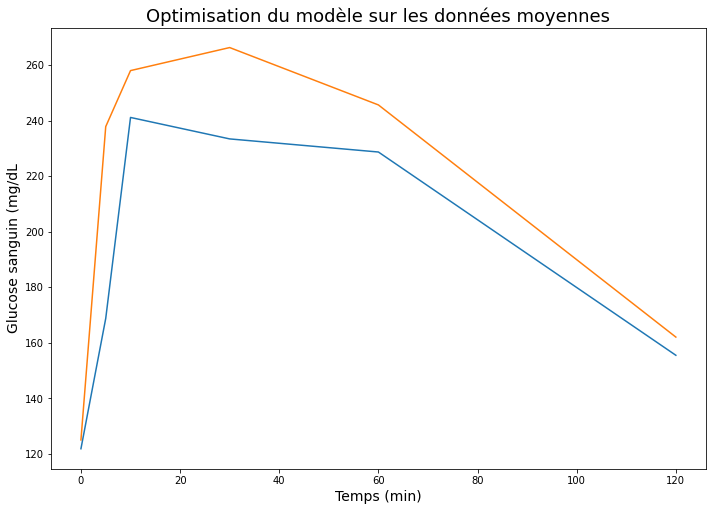

In [48]:
# Test
plt.rcParams["figure.figsize"] = [10, 7]

def Za1(Z,t):

    Gi, Gs, I, U = Z

    Gs_base = 150

    res = [
        -Gi*U ,        
        Gi*U - (s*I*Gs + b*max(0, Gs-Gs_base)),
        r*Gs - m*I,
        -k*U
    ]

    return res

k,b,s,r,m = list(minimum)
y0 = [ G0, Gs_ini, I_ini, U0]
y = odeint(Za1,y0,dctrl[1:,0])

plt.rcParams["figure.figsize"] = [10, 7.2]

plt.plot(dctrl[1:,0],moy)
plt.plot(dctrl[1:,0],y[:,1])
plt.title('Optimisation du modèle sur les données moyennes',fontsize = 18)

plt.xlabel('Temps (min)',fontsize = 14)
plt.ylabel('Glucose sanguin (mg/dL',fontsize = 14)

plt.tight_layout()

plt.show()

In [10]:
# Visiblement cela semble correspondre pour la moyenne

In [11]:
## Obtention des paramètres de chaque souris

In [12]:
# Paramètres optimaux de chaque souris
Minimum = []
for i in range(1,len(dctrl[0])) :

    def sse(param) :

        k,b,s,r,m = param
        Gs_ini = dctrl[0,i]
        y0 = [G0,Gs_ini,I_ini,U0]    
        y = odeint(Za,y0,dctrl[1:,0], args = (k,b,s,r,m))

        return np.sum((y[:,1]-dctrl[1:,i])**2) + (k<0)*1e8 + (b<0)*1e8 + (s<0)*1e8 +(r<0)*1e8 +(m<0)*1e8

    Minimum.append(fmin(sse, minimum))

Optimization terminated successfully.
         Current function value: 2285.250493
         Iterations: 291
         Function evaluations: 475
Optimization terminated successfully.
         Current function value: 1469.203405
         Iterations: 117
         Function evaluations: 200
Optimization terminated successfully.
         Current function value: 4417.207246
         Iterations: 194
         Function evaluations: 331
Optimization terminated successfully.
         Current function value: 17729.640229
         Iterations: 396
         Function evaluations: 653
Optimization terminated successfully.
         Current function value: 1517.987972
         Iterations: 355
         Function evaluations: 589
Optimization terminated successfully.
         Current function value: 2448.065139
         Iterations: 414
         Function evaluations: 692
Optimization terminated successfully.
         Current function value: 4037.909161
         Iterations: 235
         Function evaluations: 40

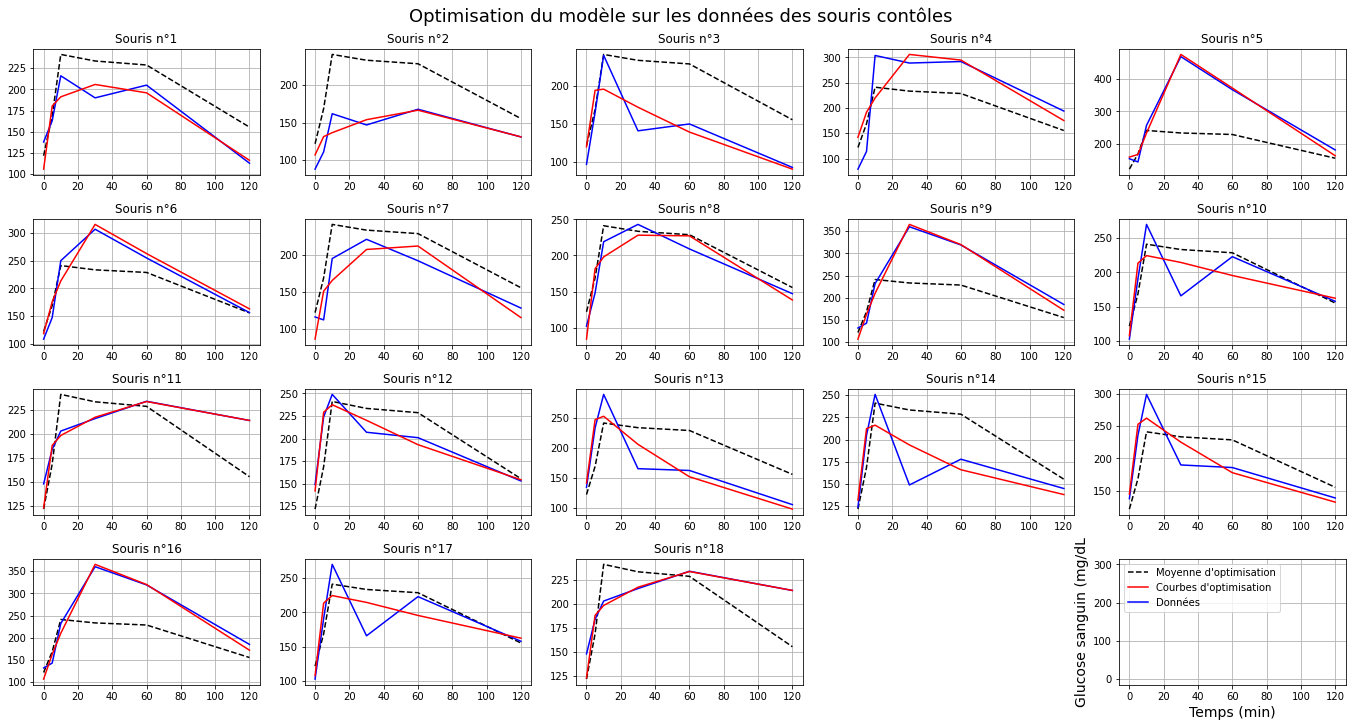

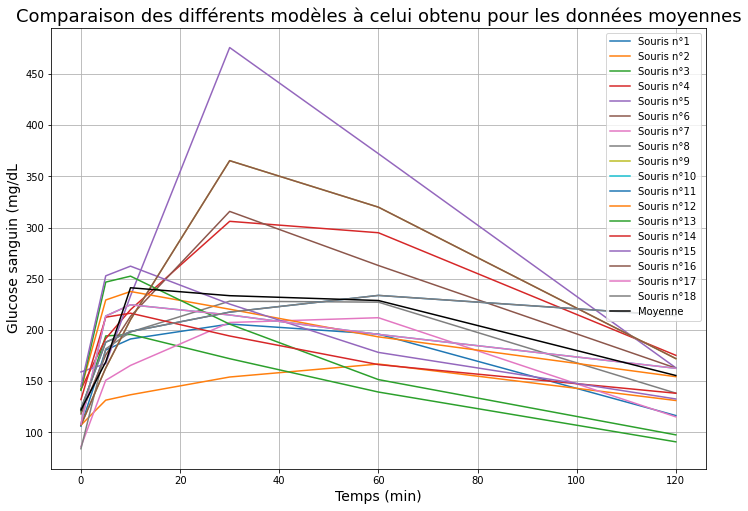

In [56]:
# Affichage des courbes de chaque souris

def Za1(Z,t):

    Gi, Gs, I, U = Z

    Gs_base = 150

    res = [
        -Gi*U ,        
        Gi*U - (s*I*Gs + b*max(0, Gs-Gs_base)),
        r*Gs - m*I,
        -k*U
    ]

    return res

plt.rcParams["figure.figsize"] = [19, 10]

plt.figure()
plt.suptitle('Optimisation du modèle sur les données des souris contôles',fontsize = 18)
for i in range(len(Minimum)) :

    plt.subplot(4,5,i+1)
    k,b,s,r,m = list(Minimum[-1])
    Gs_ini = dctrl[0,i+1]
    y0 = [G0,Gs_ini,I_ini,U0]  
    y = odeint(Za1,y0,dctrl[1:,0])    
    plt.plot(dctrl[1:,0],moy, color = 'k', linestyle='--')
    
    k,b,s,r,m = list(Minimum[i])
    Gs_ini = dctrl[0,i+1]
    y0 = [G0,Gs_ini,I_ini,U0]  
    y = odeint(Za1,y0,dctrl[1:,0])

    plt.plot(dctrl[1:,0],dctrl[1:,i+1], color = 'b')
    plt.plot(dctrl[1:,0],y[:,1], color = 'r')
    plt.grid()
    plt.title(f"Souris n°{i+1}")

plt.subplot(4,5,20)

plt.plot(0,0,color='k',linestyle='--',label = "Moyenne d'optimisation")
plt.plot(0,0,color='r',label = "Courbes d'optimisation")
plt.plot(0,0,color='b',label = "Données")
plt.plot(120,300)
plt.tight_layout()
plt.grid()
plt.xlabel('Temps (min)',fontsize = 14)
plt.ylabel('Glucose sanguin (mg/dL',fontsize = 14)
plt.legend()

plt.rcParams["figure.figsize"] = [10, 7.2]
plt.figure()
for i in range(len(Minimum)) :

    k,b,s,r,m = list(Minimum[i])
    Gs_ini = dctrl[0,i+1]
    y0 = [G0,Gs_ini,I_ini,U0]  
    y = odeint(Za1,y0,dctrl[1:,0])    
    plt.plot(dctrl[1:,0],y[:,1], label = f'Souris n°{i+1}')
    
k,b,s,r,m = list(Minimum[-1])
y = odeint(Za1,y0,dctrl[1:,0])    
plt.plot(dctrl[1:,0],moy,'k', label = 'Moyenne')
plt.grid()
plt.legend()
plt.title('Comparaison des différents modèles à celui obtenu pour les données moyennes',fontsize = 18)
plt.xlabel('Temps (min)',fontsize = 14)
plt.ylabel('Glucose sanguin (mg/dL',fontsize = 14)

plt.tight_layout()
plt.show()

In [14]:
# Il semblerait que les données moyennes 'fittent' plus que les données optimales individuelles

In [15]:
## Applications sur les données ko

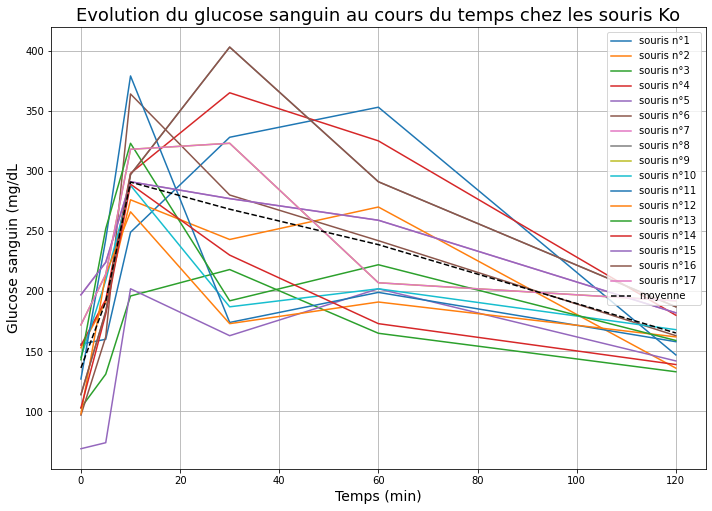

In [57]:
# Transformation des données : ajout d'une moyenne
plt.rcParams["figure.figsize"] = [10, 7.2]
moy2 = np.ones((len(dko[:,1])-1,))
for k in range(len(moy2)) :
    moy2[k] = round(np.sum(dko[k+1,1:])/len(dko[k+1,1:]),2)

for k in range(1,len(dko[1,:])):
    plt.plot(dko[1:,0],dko[1:,k], label = f'souris n°{k}')
plt.plot(dko[1:,0],moy2, linestyle='--', color = 'k', label = 'moyenne')
plt.grid()
plt.legend()
plt.title('Evolution du glucose sanguin au cours du temps chez les souris Ko',fontsize = 18)

plt.xlabel('Temps (min)',fontsize = 14)
plt.ylabel('Glucose sanguin (mg/dL',fontsize = 14)
plt.tight_layout()
plt.show()

In [17]:
# Optimisation
def sse(param) :

    k,b,s,r,m = param
    y0 = [G0,Gs_ini,I_ini,U0]    
    y = odeint(Za,y0,dko[1:,0], args = (k,b,s,r,m))

    return np.sum((y[:,1]-moy2)**2) + (k<0)*1e8 + (b<0)*1e8 + (s<0)*1e8 +(r<0)*1e8 +(m<0)*1e8


G0, U0, Gs_ini, I_ini = 2500, 0.04, 100, 10

minimum = fmin(sse, [ 0.01, 0.001, 0.1, 0.001, 0.1])
print(minimum)

Optimization terminated successfully.
         Current function value: 4288.157243
         Iterations: 424
         Function evaluations: 698
[1.28228653e-09 3.57198425e-03 3.83872906e-02 6.47185515e-05
 4.43382653e-02]


In [18]:
# Paramètres optimaux de chaque souris
Minimum2 = []
for i in range(1,len(dko[0])) :

    def sse(param) :

        k,b,s,r,m = param
        Gs_ini = dko[0,i]
        y0 = [G0,Gs_ini,I_ini,U0]    
        y = odeint(Za,y0,dko[1:,0], args = (k,b,s,r,m))

        return np.sum((y[:,1]-dko[1:,i])**2) + (k<0)*1e8 + (b<0)*1e8 + (s<0)*1e8 +(r<0)*1e8 +(m<0)*1e8

    Minimum2.append(fmin(sse, minimum))

Optimization terminated successfully.
         Current function value: 2285.007448
         Iterations: 281
         Function evaluations: 454
Optimization terminated successfully.
         Current function value: 3363.936759
         Iterations: 304
         Function evaluations: 515
Optimization terminated successfully.
         Current function value: 584.008236
         Iterations: 359
         Function evaluations: 580
Optimization terminated successfully.
         Current function value: 4203.419778
         Iterations: 343
         Function evaluations: 567
Optimization terminated successfully.
         Current function value: 7262.210905
         Iterations: 126
         Function evaluations: 211
Optimization terminated successfully.
         Current function value: 15927.452463
         Iterations: 316
         Function evaluations: 514
Optimization terminated successfully.
         Current function value: 8437.634993
         Iterations: 235
         Function evaluations: 403

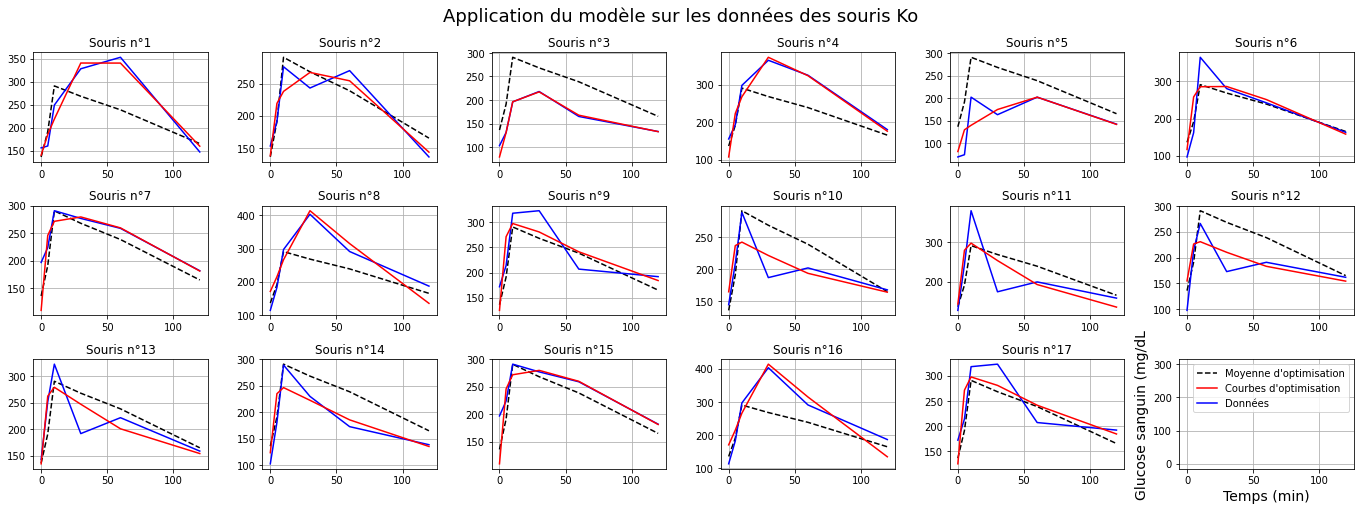

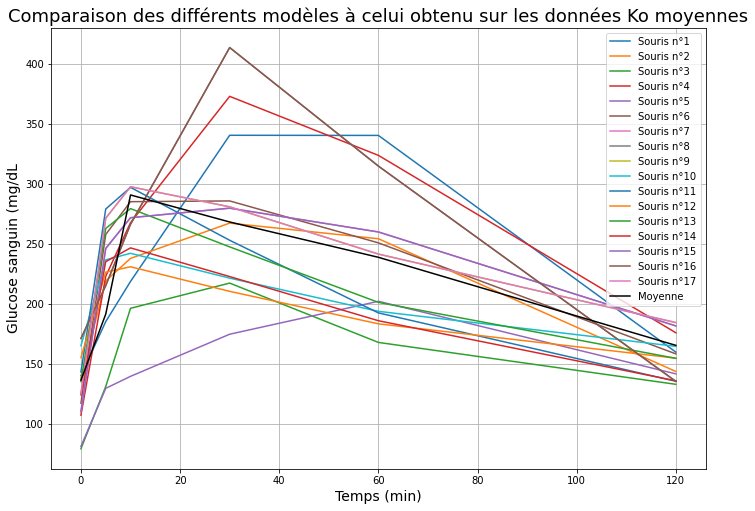

In [55]:
# Affichage des courbes de chaque souris

def Za1(Z,t):

    Gi, Gs, I, U = Z

    Gs_base = 150

    res = [
        -Gi*U ,        
        Gi*U - (s*I*Gs + b*max(0, Gs-Gs_base)),
        r*Gs - m*I,
        -k*U
    ]

    return res


plt.rcParams["figure.figsize"] = [19, 7.2]
plt.figure()
plt.suptitle('Application du modèle sur les données des souris Ko',fontsize = 18)
for i in range(len(Minimum2)) :

    plt.subplot(3,6,i+1)
    k,b,s,r,m = list(Minimum2[-1])
    Gs_ini = dko[0,i+1]
    y0 = [G0,Gs_ini,I_ini,U0]  
    y = odeint(Za1,y0,dko[1:,0])    
    plt.plot(dko[1:,0],moy2,color ='k', linestyle='--')
    
    k,b,s,r,m = list(Minimum2[i])
    Gs_ini = dko[0,i+1]
    y0 = [G0,Gs_ini,I_ini,U0]  
    y = odeint(Za1,y0,dko[1:,0])

    plt.plot(dko[1:,0],dko[1:,i+1], color = 'b')
    plt.plot(dko[1:,0],y[:,1], color = 'r')
    plt.grid()
    
    plt.title(f"Souris n°{i+1}")

plt.subplot(3,6,18)

plt.plot(0,0,color='k',linestyle='--',label = "Moyenne d'optimisation")
plt.plot(0,0,color='r',label = "Courbes d'optimisation")
plt.plot(0,0,color='b',label = "Données")
plt.plot(120,300)

plt.grid()
plt.xlabel('Temps (min)',fontsize = 14)
plt.ylabel('Glucose sanguin (mg/dL',fontsize = 14)
plt.tight_layout()
plt.legend()

plt.rcParams["figure.figsize"] = [10, 7.2]
plt.figure()
for i in range(0,len(Minimum2)) :

    k,b,s,r,m = list(Minimum2[i])
    Gs_ini = dko[0,i+1]
    y0 = [G0,Gs_ini,I_ini,U0]  
    y = odeint(Za1,y0,dko[1:,0])    
    plt.plot(dko[1:,0],y[:,1], label = f'Souris n°{i+1}')
    
k,b,s,r,m = list(Minimum2[-1])
y = odeint(Za1,y0,dko[1:,0])    
plt.plot(dko[1:,0],moy2,'k', label = 'Moyenne')
plt.grid()
plt.title('Comparaison des différents modèles à celui obtenu sur les données Ko moyennes',fontsize = 18)
plt.legend()
plt.xlabel('Temps (min)',fontsize = 14)
plt.ylabel('Glucose sanguin (mg/dL',fontsize = 14)
plt.tight_layout()
plt.show()

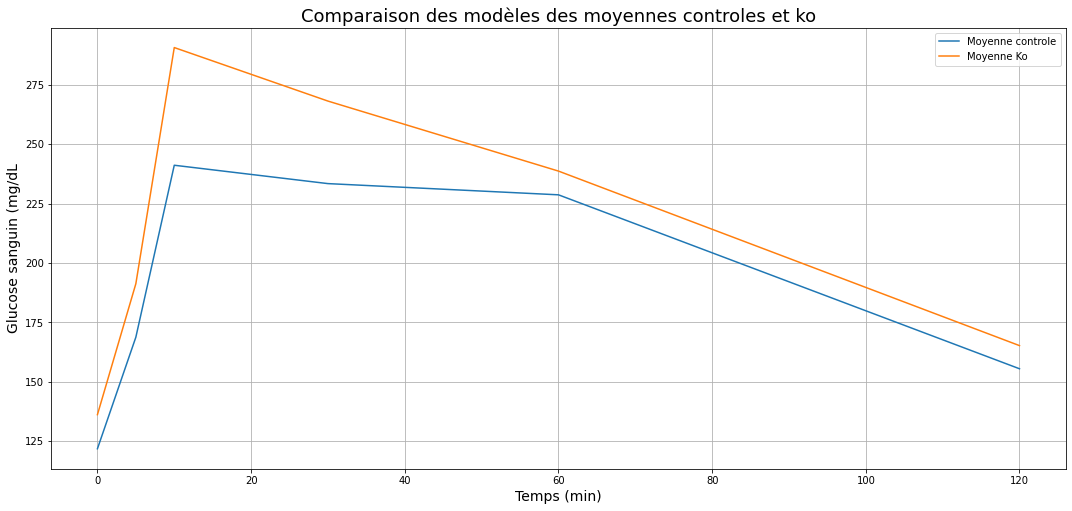

In [54]:
plt.rcParams["figure.figsize"] = [15, 7.2]

plt.title('Comparaison des moyennes controles et ko',fontsize = 18)
plt.plot(dctrl[1:,0],moy,label = 'Moyenne controle')
plt.plot(dctrl[1:,0],moy2,label = 'Moyenne Ko')
plt.grid()
plt.legend()
plt.xlabel('Temps (min)',fontsize = 14)
plt.ylabel('Glucose sanguin (mg/dL',fontsize = 14)
plt.tight_layout()
plt.show()

In [21]:
A = np.asarray([7.76910056e-10, 3.73824342e-03, 4.84877691e-02, 6.72293076e-05, 4.85537426e-02])
B = np.asarray([1.28228653e-09, 3.57198425e-03, 3.83872906e-02, 6.47185515e-05, 4.43382653e-02])
C = ((B/A)-1)*100
print(C)
print(B[0]/A[0])

[ 65.04954725  -4.44752124 -20.8309821   -3.73461544  -8.6820852 ]
1.6504954725415473


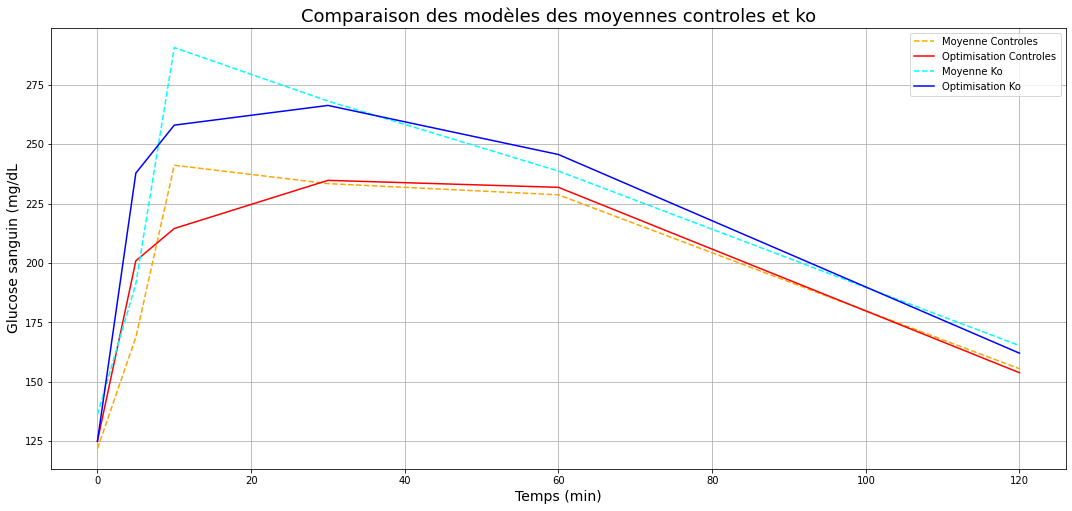

In [53]:
# Test
def Za1(Z,t):

    Gi, Gs, I, U = Z

    Gs_base = 150

    res = [
        -Gi*U ,        
        Gi*U - (s*I*Gs + b*max(0, Gs-Gs_base)),
        r*Gs - m*I,
        -k*U
    ]

    return res

plt.rcParams["figure.figsize"] = [15, 7.2]

k,b,s,r,m = [7.76910056e-10, 3.73824342e-03, 4.84877691e-02, 6.72293076e-05, 4.85537426e-02]
y0 = [ 2500, Gs_ini, I_ini, U0]
y1 = odeint(Za1,y0,dctrl[1:,0])

plt.plot(dctrl[1:,0],moy, color = 'orange',linestyle='--', label = 'Moyenne Controles')
plt.plot(dctrl[1:,0],y1[:,1], color = 'red',label = 'Optimisation Controles')


k,b,s,r,m = [1.28228653e-09, 3.57198425e-03, 3.83872906e-02, 6.47185515e-05, 4.43382653e-02]
y0 = [ 2500, Gs_ini, I_ini, U0]
y2 = odeint(Za1,y0,dctrl[1:,0])

plt.plot(dctrl[1:,0],moy2, color = 'cyan',linestyle='--', label = 'Moyenne Ko')
plt.plot(dctrl[1:,0],y2[:,1],color = 'blue', label = 'Optimisation Ko')




plt.title('Comparaison des modèles des moyennes controles et ko',fontsize = 18)
plt.grid()
plt.legend()
plt.xlabel('Temps (min)')
plt.ylabel('Glucose sanguin (mg/dL')
plt.xlabel('Temps (min)',fontsize = 14)
plt.ylabel('Glucose sanguin (mg/dL',fontsize = 14)
plt.tight_layout()
plt.show()

In [23]:
Minimum

[array([1.15218814e-09, 4.48658870e-09, 5.45017471e-02, 9.76481086e-05,
        4.82363029e-02]),
 array([7.20896262e-10, 3.03550947e-03, 7.77822416e-02, 4.58619941e-05,
        4.83323496e-02]),
 array([5.12496003e-16, 5.73761673e-03, 4.79992340e-02, 4.98584906e-05,
        3.39934312e-02]),
 array([3.13111829e-09, 6.83118978e-02, 5.60275688e-02, 2.11301278e-12,
        7.72920981e-02]),
 array([1.20239177e-16, 7.57651389e-03, 8.19906167e-02, 1.42290173e-04,
        1.36064123e-01]),
 array([1.82421944e-10, 1.04051611e-01, 6.63199646e-02, 7.90148125e-12,
        9.79880876e-02]),
 array([4.32235573e-16, 6.55749297e-03, 6.89937153e-02, 1.11430319e-04,
        5.93645489e-02]),
 array([3.49611008e-15, 6.77699839e-03, 5.42338183e-02, 8.63154630e-05,
        5.29534095e-02]),
 array([3.93721794e-08, 7.58921023e-02, 7.66245509e-02, 3.92737715e-12,
        1.11364701e-01]),
 array([1.81333361e-09, 5.73585265e-08, 4.28677482e-02, 1.52305746e-05,
        3.71109808e-02]),
 array([1.50113657e-

In [24]:
Minimum2

[array([1.13480265e-09, 2.37354882e-09, 6.02280395e-02, 1.22351557e-04,
        8.15707406e-02]),
 array([1.11645156e-09, 2.13823329e-09, 4.44918459e-02, 1.04259380e-04,
        5.23608092e-02]),
 array([1.67729024e-09, 3.98671396e-01, 1.32361849e-01, 1.48188422e-04,
        1.94915916e-01]),
 array([2.29080747e-08, 6.90901190e-02, 4.55657991e-02, 7.53729523e-11,
        8.69534503e-02]),
 array([6.01877547e-10, 2.64926592e-04, 8.06523959e-02, 5.89709667e-05,
        5.54891525e-02]),
 array([2.55182047e-09, 2.32703918e-08, 3.37219252e-02, 7.37387397e-05,
        4.18389303e-02]),
 array([9.48751435e-10, 2.41392349e-08, 3.59503207e-02, 5.35296724e-05,
        4.27325192e-02]),
 array([1.77569860e-16, 4.61966740e-03, 5.43366373e-02, 2.19664697e-04,
        1.03127197e-01]),
 array([3.29501812e-09, 1.04129194e-09, 3.09208148e-02, 2.02125851e-05,
        3.47766856e-02]),
 array([4.79696506e-09, 2.43857742e-09, 3.91342307e-02, 9.64141118e-09,
        3.40330549e-02]),
 array([8.02859798e-